In [1]:
import numpy as np
import h5py
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f = h5py.File("../data/contractor_data.hdf5", "r")

In [3]:
xdat = xr.DataArray(f["errors"][:, :], dims=("size", "chi"), \
                    coords={"size": f["sizes"][:], "chi": f["chis"][:]}, name="errors")
df = xdat.to_dataframe()

<Axes: xlabel='chi', ylabel='errors'>

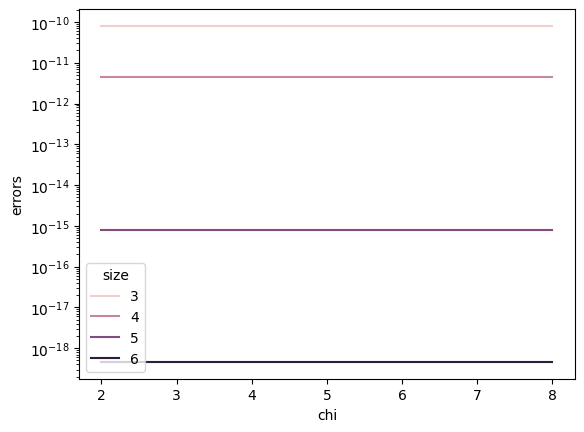

In [4]:
fig, ax = plt.subplots()
ax.set_yscale('log')
sns.lineplot(data=df, x="chi", y="errors", markers=["."], hue="size")
#plt.savefig("../data/contractor_error_plot.pdf")

In [5]:
speedups = f["my_times"][:]
print(type(speedups))
for i in range(f["quimb_times"][:].size):
    speedups[i, :] = speedups[i, :] / f["quimb_times"][i]

xdat2 = xr.DataArray(speedups, dims=("size", "chi"), \
                    coords={"size": f["sizes"][:], "chi": f["chis"][:]}, \
                    name="speedups")
df2 = xdat2.to_dataframe()

<class 'numpy.ndarray'>


(0.0, 10.0)

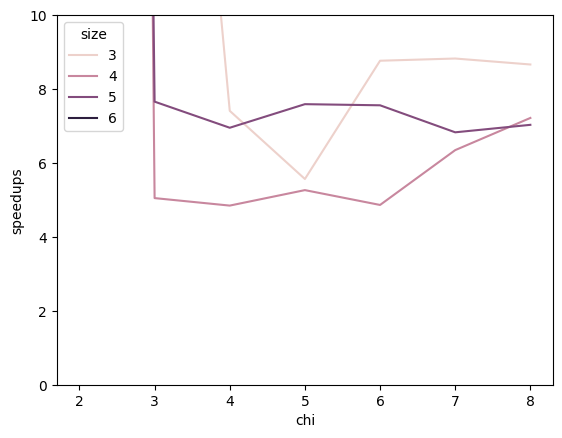

In [6]:
fig2, ax2 = plt.subplots()
sns.lineplot(data=df2, ax=ax2, x="chi", y="speedups", hue="size")
ax2.set_ylim(0.0, 10.0)
#plt.savefig("../data/contractor_speedup_plot.pdf")

In [7]:
f.close()